In [19]:
import numpy as np # had to downgrade NumPy to resolve compatiblity issue
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [3]:
housing.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyle    

In [13]:
RE_data = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)
RE_data.shape

/var/folders/4s/xd_3ly695k1gl73bn_9m85j40000gn/T/ipykernel_90490/3216602497.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  RE_data = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)


(22213, 90)

In [14]:
RE_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 22213 entries, 520400001 to 1018100150
Data columns (total 90 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GeoRefNo      22213 non-null  int64  
 1   Tier          22213 non-null  int64  
 2   Range         22213 non-null  int64  
 3   Prop_Addr     22193 non-null  object 
 4   ZngCdPr       22107 non-null  object 
 5   ZngCdSc       26 non-null     object 
 6   ZngOLPr       1970 non-null   object 
 7   ZngOLSc       153 non-null    object 
 8   ClassPr_S     22213 non-null  object 
 9   ClassSc_S     22213 non-null  object 
 10  Legal_Pr      22213 non-null  object 
 11  SchD_S        22213 non-null  int64  
 12  TxD_S         22213 non-null  int64  
 13  MA_Ownr1      22213 non-null  object 
 14  MA_Ownr2      2876 non-null   object 
 15  MA_Line1      22199 non-null  object 
 16  MA_Line2      0 non-null      float64
 17  MA_City       22199 non-null  object 
 18  MA_State      2219

## Data Cleaning (trying to see which records need to be taken out)

### Data Cleaning - Rows

In [12]:
# check dulicated rows
housing.groupby('PID').filter(lambda x: len(x) > 1)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [38]:
# if a house had multiple transactions in the data frame, I elected to keep only the most recent sales data on any property
housing_dedupe = housing.sort_values(by=['PID', 'YrSold','MoSold'], 
                    ascending=[True, False, False]).drop_duplicates(subset='PID', keep='first')
housing_dedupe

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
224,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
323,526302030,1293,149900,20,RL,NaN,11027,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
898,526302040,1024,157500,20,RL,85.0,10533,Pave,NaN,IR1,...,280,0,NaN,NaN,NaN,0,8,2006,WD,Normal
423,526302110,882,124500,20,RL,74.0,13008,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
542,526302120,1797,169000,20,RL,NaN,11765,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,924100070,1389,170000,20,RL,77.0,10010,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
477,924151040,1803,285000,20,RL,76.0,9892,Pave,NaN,Reg,...,0,0,NaN,GdWo,NaN,0,2,2010,WD,Normal
281,924151050,2000,188000,60,RL,74.0,9627,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
648,924152030,1797,231000,60,RL,74.0,12961,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal


In [16]:
# MSZoning: Identifies the general zoning classification of the sale.
# Only keeps MSZoning = RH, RL or RM which represents Residential zoning
housing_dedupe.MSZoning.value_counts()

MSZoning
RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: count, dtype: int64

In [39]:
# Only keeps MSZoning = RH, RL or RM which represents Residential zoning
# Only keeps SaleCondition, meaning the Condition of sale is not Abnormal Sale -  trade, foreclosure, short sale or Sale between family members
housing_filtered_rows = housing_dedupe[
    (housing_dedupe['MSZoning'].isin(['RL', 'RM', 'RH'])) &
    (~housing_dedupe['SaleCondition'].isin(['Abnorml', 'Family']))
]
housing_filtered_rows

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
224,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
323,526302030,1293,149900,20,RL,NaN,11027,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
898,526302040,1024,157500,20,RL,85.0,10533,Pave,NaN,IR1,...,280,0,NaN,NaN,NaN,0,8,2006,WD,Normal
423,526302110,882,124500,20,RL,74.0,13008,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
542,526302120,1797,169000,20,RL,NaN,11765,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,924100060,1632,173000,60,RL,70.0,10457,Pave,NaN,IR1,...,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal
768,924100070,1389,170000,20,RL,77.0,10010,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
477,924151040,1803,285000,20,RL,76.0,9892,Pave,NaN,Reg,...,0,0,NaN,GdWo,NaN,0,2,2010,WD,Normal
281,924151050,2000,188000,60,RL,74.0,9627,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


### Data Cleaning - Columns

PoolQC          99.651163
MiscFeature     96.240310
Alley           93.488372
Fence           79.651163
MasVnrType      60.968992
FireplaceQu     48.100775
LotFrontage     17.906977
GarageCond       5.000000
GarageQual       5.000000
GarageFinish     5.000000
GarageYrBlt      5.000000
GarageType       4.922481
BsmtExposure     2.751938
BsmtFinType2     2.713178
BsmtCond         2.674419
BsmtQual         2.674419
BsmtFinType1     2.674419
MasVnrArea       0.542636
BsmtHalfBath     0.077519
BsmtFullBath     0.077519
BsmtFinSF1       0.038760
GarageCars       0.038760
GarageArea       0.038760
TotalBsmtSF      0.038760
BsmtUnfSF        0.038760
BsmtFinSF2       0.038760
Electrical       0.038760
dtype: float64


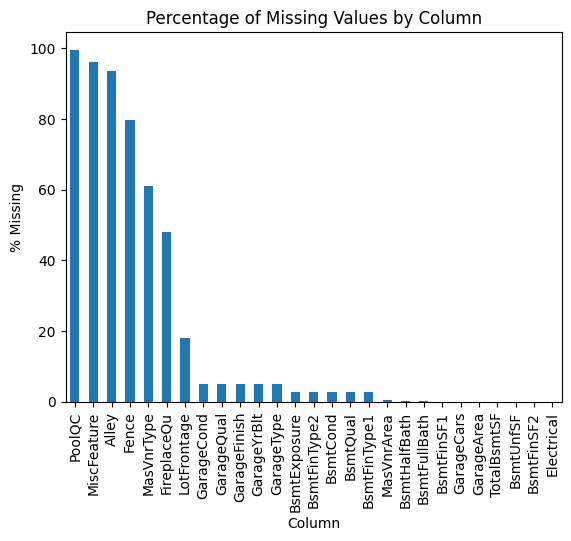

In [35]:
# Calculate % missing
missing_percent = housing.isna().mean() * 100

# Filter only columns with missing values
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)


print(missing_percent)

missing_percent.sort_values(ascending=False).plot.bar()
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% Missing')
plt.xlabel('Column')
plt.show()


# Columns with over 40% missing value (N/A) are all categorical features so we are keeping them
# To-do: for numerical features, replace NA with zero

In [18]:
housing.groupby('SaleCondition')['SalePrice'].describe()


,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,61.0,143739.754098,76041.592574,12789.0,112000.0,132000.0,167000.0,475000.0
AdjLand,2.0,138750.000000,15909.902577,127500.0,133125.0,138750.0,144375.0,150000.0
Alloca,4.0,156766.500000,15556.542214,142953.0,148920.0,152556.5,160403.0,179000.0
Family,17.0,146958.823529,41490.255766,82500.0,133000.0,149000.0,152000.0,235000.0
Normal,2414.0,175575.278790,70965.896790,35000.0,129500.0,159000.0,206675.0,755000.0
Partial,82.0,285172.121951,107858.129091,115000.0,198925.0,254146.5,360535.0,611657.0


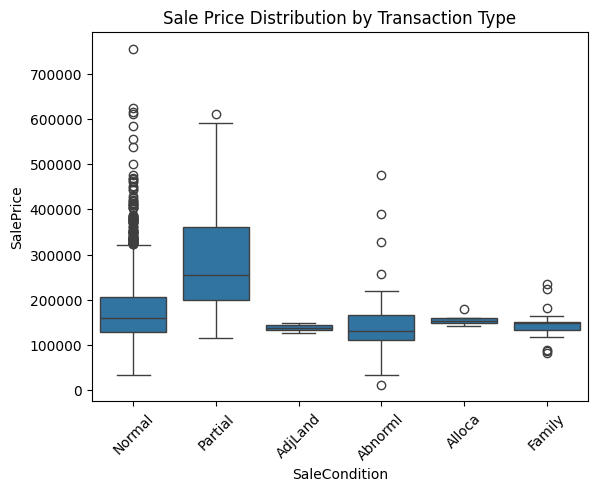

In [20]:
# Boxplot for comparing distributions
sns.boxplot(x='SaleCondition', y='SalePrice', data=housing)
plt.xticks(rotation=45)
plt.title("Sale Price Distribution by Transaction Type")
plt.show()


In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

- Nominal Variables (Categorical, No Order)
- Ordinal Variables (Categorical, With Order)
- Discrete Variables (Quantitative, Countable)
- Continuous Variables (Quantitative, Measurable)

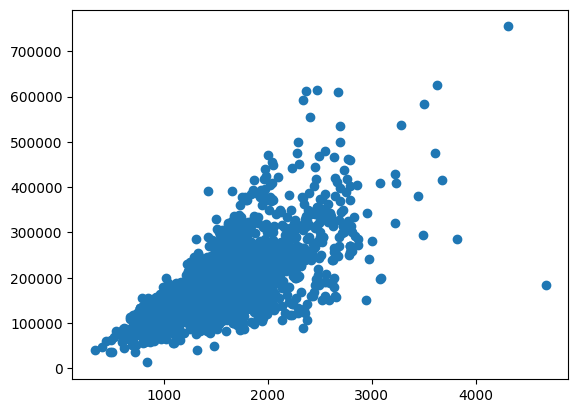

In [6]:
plt.scatter(housing.GrLivArea, housing.SalePrice)

In [7]:
import seaborn as sns

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

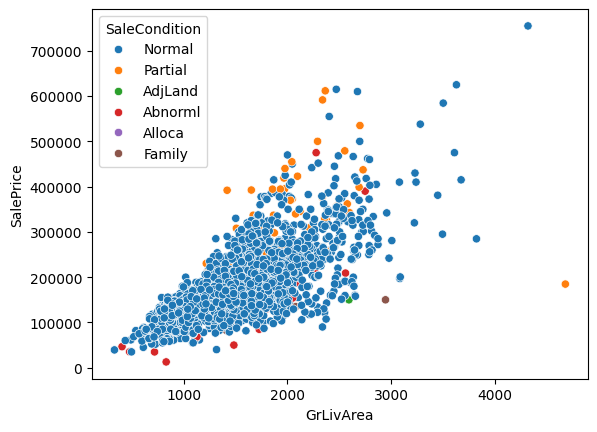

In [8]:
sns.scatterplot(data=housing, x='GrLivArea', y='SalePrice', hue='SaleCondition')

## Feature Engineering
1. Assign quarter to 'MoSold' to assist seasonality analysis
2. Calculate age of the house when sold defined as year sold minus year remodeled
3. Create a column that is the combo of field 'BldgType' and 'HouseStyle' (type of dwelling and style of dwelling)
4. 

In [50]:
# import pandas as pd

# Assume df['MonthSold'] has values from 1 to 12
housing_filtered_rows.loc[:,'QrtSold'] = pd.cut(
    housing_filtered_rows['MoSold'],
    bins=[0, 3, 6, 9, 12],
    labels=['Q1', 'Q2', 'Q3', 'Q4'],
    include_lowest=True
)
housing_filtered_rows

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,QrtSold
224,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,Q2
323,526302030,1293,149900,20,RL,NaN,11027,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,Q2
898,526302040,1024,157500,20,RL,85.0,10533,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,Q3
423,526302110,882,124500,20,RL,74.0,13008,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,Q4
542,526302120,1797,169000,20,RL,NaN,11765,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,924100060,1632,173000,60,RL,70.0,10457,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,Q2
768,924100070,1389,170000,20,RL,77.0,10010,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,Q2
477,924151040,1803,285000,20,RL,76.0,9892,Pave,NaN,Reg,...,0,NaN,GdWo,NaN,0,2,2010,WD,Normal,Q1
281,924151050,2000,188000,60,RL,74.0,9627,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,Q4


## Seasonality Analysis

In [51]:
monthly_counts = housing_filtered_rows['MoSold'].value_counts().sort_index()
monthly_counts

quarterly_counts = (
    housing_filtered_rows
    .groupby(['YrSold', 'QrtSold'])
    .size()
    .reset_index(name='SalesCount')
    .sort_values(['YrSold', 'QrtSold'])
)

quarterly_counts

,YrSold,QrtSold,SalesCount
0,2006,Q1,71
1,2006,Q2,185
2,2006,Q3,148
3,2006,Q4,69
4,2007,Q1,94
5,2007,Q2,208
6,2007,Q3,176
7,2007,Q4,80
8,2008,Q1,70
9,2008,Q2,214


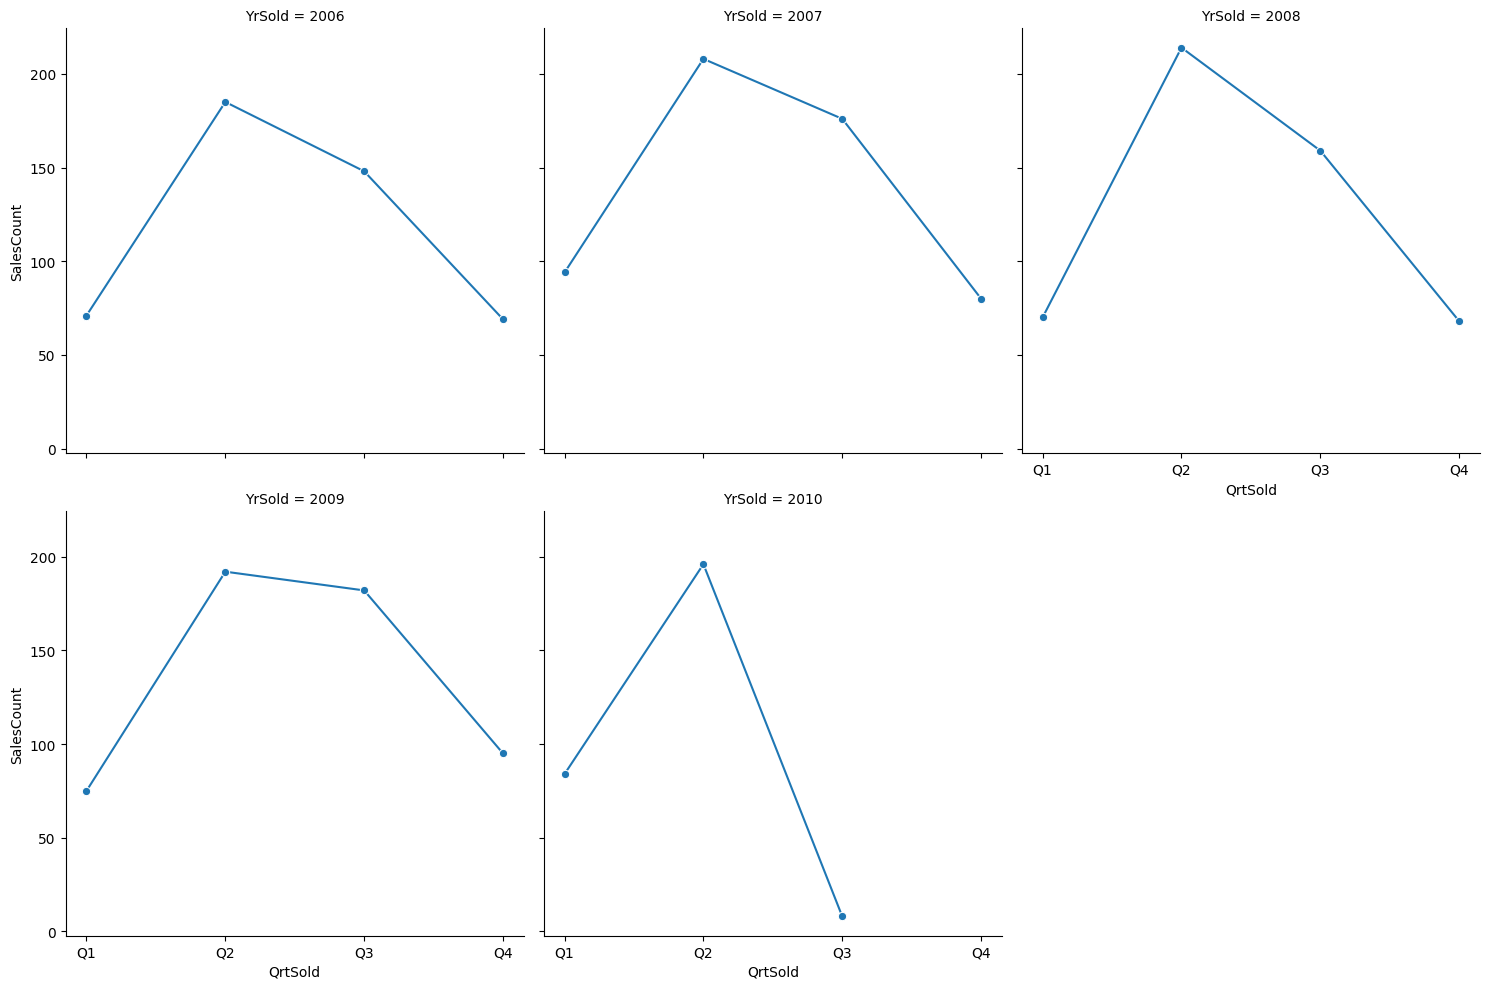

In [53]:
# import seaborn as sns

sns.relplot(data=quarterly_counts, x='QrtSold', y='SalesCount', col='YrSold', kind='line', marker='o', col_wrap=3)


In [37]:
housing.loc[ :,['YearBuilt','YearRemodAdd','MoSold','YrSold']]

,YearBuilt,YearRemodAdd,MoSold,YrSold
1,1939,1950,3,2010
2,1984,1984,2,2009
3,1930,2007,11,2007
4,1900,2003,5,2009
5,2001,2001,11,2009
...,...,...,...,...
759,1916,1950,5,2009
760,1955,1955,6,2009
761,1949,1950,8,2007
762,2000,2000,7,2007


In [41]:
housing.loc[ :,['PID','BldgType','HouseStyle']]

,PID,BldgType,HouseStyle
1,909176150,1Fam,1Story
2,905476230,TwnhsE,1Story
3,911128020,1Fam,1Story
4,535377150,1Fam,2Story
5,534177230,1Fam,2Story
...,...,...,...
759,903205040,1Fam,1.5Unf
760,905402060,1Fam,1Story
761,909275030,Duplex,2Story
762,907192040,1Fam,2Story


In [42]:
housing.loc[ :,['Condition1','Condition2']]

,Condition1,Condition2
1,Norm,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm
5,Norm,Norm
...,...,...
759,Norm,Norm
760,Norm,Norm
761,Norm,Norm
762,Norm,Norm


In [36]:
housing.loc[ :,['GrLivArea','1stFlrSF','2ndFlrSF','TotalBsmtSF']]

,GrLivArea,1stFlrSF,2ndFlrSF,TotalBsmtSF
1,856,856,0,856.0
2,1049,1049,0,1049.0
3,1001,1001,0,837.0
4,1039,717,322,405.0
5,1665,810,855,810.0
...,...,...,...,...
759,952,952,0,952.0
760,1733,1733,0,0.0
761,2002,1001,1001,1001.0
762,1842,985,857,985.0


In [11]:
(housing['GrLivArea'] == housing['1stFlrSF'] + housing['2ndFlrSF']).all()


False

In [15]:
housing[housing['GrLivArea'] != housing['1stFlrSF'] + housing['2ndFlrSF']].loc[ :,['GrLivArea','1stFlrSF','2ndFlrSF']]

,GrLivArea,1stFlrSF,2ndFlrSF
171,2377,1313,0
182,935,779,0
206,1484,866,504
212,1200,520,600
220,1522,1008,0
340,1382,854,0
470,2358,938,1215
475,1656,808,704
676,1531,1169,0
767,1480,1044,0


In [12]:
# import numpy as np
np.isclose(housing['GrLivArea'], housing['1stFlrSF'] + housing['2ndFlrSF']).all()


False

In [ ]:
!pip uninstall tables